# <center>Introduction to Machine Learning</center> #  
## <center>Lab Assignment 2: Classical Classification Techniques</center> ##  
#### <center>Yizhuo Li</center> ####  
#### <center>2019/02/18</center> ####

**Summary:** In class, we have discussed classification models that you can use with pre- defined features. In this assignment, you will demonstrate you understand how to apply, evaluate, and analyze these models. A successful submission of your project will consist of two contributions. First, it should include the source code of your implementation (i.e., portions indicated by “Code”): do not include a hyperlink to a website where your code is publicly available. Second, it should include a PDF document with all requested experimen- tal results and analysis (i.e., portions indicated by “Write-up”).

### 1. Construct Datasets for Training and Evaluation ###

(a) Load a real dataset of your choice that is designed for classification but was not
used in class; e.g., from sklearn.datasets, Kaggle, or your own data. (Code)  
(b) Create a 75/25 train/test split of the dataset. (Code)

In [1]:
from sklearn.datasets import load_breast_cancer

breast_cancer_data = load_breast_cancer()
X = breast_cancer_data.data
y = breast_cancer_data.target

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 2. Optimize Hyperparameter(s) for Each Classification Model ###

When evaluating each model in this problem, perform stratified 10-fold cross-validation on the training dataset and use the “accuracy” measure to assess performance.  

(a) Decision tree: find the optimal hyperparameters for the split criterion (i.e., test “gini” and “entropy”) and tree depth (i.e., test at least 6 different values) when training a decision tree. Report the optimal hyperparameters found and how many hyperparameter combinations you tested in total. (Code and Write-up)  

(b) K-Nearest Neighbors (K-NN): find the optimal hyperparameters for the distance metric (i.e., test “Euclidean” and “Manhattan”) and number of nearest neighbors (i.e., test at least 6 different values) when using k-Nearest Neighbors. Report the optimal hyperparameters found and how many hyperparameter combinations you tested in total. (Code and Write-up)  

(c) Support Vector Machine (SVM): find the optimal hyperparameters for the poly- nomial degree, kernel bandwidth (i.e., gamma), and regularization parameter (i.e., C) when training a kernel SVM with a polynomial kernel. You must evaluate all possible combinations of at least 2 degree values (for the polynomial degree), at least 3 gamma values, and at least 3 C values. Report the optimal hyperparameters found and how many hyperparameter combinations you tested in total. (Code and Write-up)

### Decision Tree ###

In [3]:
from sklearn.tree import DecisionTreeClassifier

def plotTreeAccuracy(criterion='gini'):
    accuracy = []
    bestAccuracy = 0
    bestDepth = 0
    depth_settings = range(1,15)
    for depth in depth_settings:
        # build the model
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=depth)
        clf.fit(X_train, y_train)
        # Record test set accuracy
        curAccuracy = clf.score(X_test, y_test)
        accuracy.append(curAccuracy)
        if curAccuracy>bestAccuracy:
            bestAccuracy=curAccuracy
            bestDepth = depth
    print('best Depth of ',criterion,' is ',bestDepth,' with the best Accuracy ', bestAccuracy)
    plt.plot(depth_settings, accuracy, label= criterion+' accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('number of depth')
    plt.legend()

best Depth of  gini  is  3  with the best Accuracy  0.951048951048951
best Depth of  entropy  is  3  with the best Accuracy  0.958041958041958


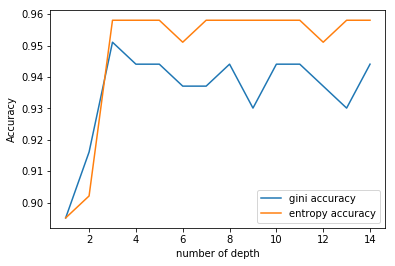

In [4]:
# Why every time I run this function, the result is unsame?
import matplotlib.pyplot as plt
%matplotlib inline

plotTreeAccuracy()
plotTreeAccuracy('entropy')

Form the plot above, we could see that we try two different criterion and each criterion we try 14 different depth. So, in total, we try 28 different hyperparameter combinations.  
The best hyperparameter combinations is when the criterion is entropy and when the depth is 3. So, we will use this hyperparameter combinations to do the cross-validation.  
However, what's interesting is every time I run this block, the diagram is different. I am not sure what's going on here.

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def cross_val(model):
    kflod = KFold(n_splits=10, shuffle=True, random_state=2)
    fold_accuracies = cross_val_score(model, X_train, y_train, cv=kflod)
    print('Cross validation score:\n{}'.format(fold_accuracies))
    print('Average cross-validation score: {:.2f}'.format(fold_accuracies.mean()))

In [6]:
clfTreeBest = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clfTreeBest.fit(X_train, y_train)

cross_val(clfTreeBest)

Cross validation score:
[0.97674419 0.97674419 0.93023256 0.90697674 0.93023256 0.90697674
 1.         1.         0.95238095 0.92857143]
Average cross-validation score: 0.95


From the Cross validation score above, we could see that the distribution of the Cross validation score is relatively stable.

### K-Nearest Neighbors (K-NN) ###

In [7]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

def plotNumNeighborsVsAccuracy(P_value=2, metric_value='minkowski'):
    bestAccuracy = 0
    bestK = 0
    test_accuracy = []
    neighbor_settings = range(1,11)
    for curKvalue in neighbor_settings:
        # build the model
        clf = KNeighborsClassifier(n_neighbors=curKvalue, p=P_value, metric=metric_value)
        clf.fit(X_train_norm, y_train)

        # Record test set accuracy
        curTestAccuracy = clf.score(X_test_norm, y_test)
        test_accuracy.append(curTestAccuracy)
        if curTestAccuracy>bestAccuracy:
            bestAccuracy=curTestAccuracy
            bestK = curKvalue
    print('best K value of ',metric_value,' is ',bestK,' with the best Accuracy ', bestAccuracy)

    plt.plot(neighbor_settings, test_accuracy, label=metric_value+' accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('number of neighbor')
    plt.legend()

best K value of  minkowski  is  3  with the best Accuracy  0.972027972027972
best K value of  manhattan  is  3  with the best Accuracy  0.972027972027972


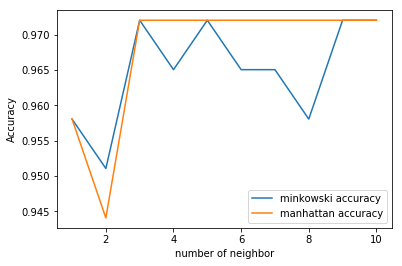

In [9]:
plotNumNeighborsVsAccuracy()
plotNumNeighborsVsAccuracy(1,'manhattan')

From the diagram above, we test two different metric and each metric we test 10 different neighbors. So, in total, we try 20 different hyperparameter combinations. We can see that the manhattan's whold performance is better than minkowski. However, the best persormance of minkowski is same with manhattan.  
The best hyperparameter combinations is when the metric is manhattan or minkowski and when the number of neighbor is 3,5,9 or 10. So, we will use one of them as the optimal hyperparameter combinations to do the cross-validation.  
For this block, everytime I run it, the result is the same.

In [10]:
clfKNN = KNeighborsClassifier(n_neighbors=5, p=1, metric='manhattan')
clfKNN.fit(X_train_norm, y_train)

cross_val(clfKNN)

Cross validation score:
[0.93023256 0.93023256 0.90697674 0.90697674 0.93023256 0.95348837
 0.95238095 1.         0.95238095 0.88095238]
Average cross-validation score: 0.93


From the Cross validation score above, we could see that 1 in 10 times, the Cross validation score is less than 0.9. So, we can't guarantee that our split dataset is good for trainning.

### Support Vector Machine (SVM) ###

In [11]:
from sklearn.preprocessing import StandardScaler
# Transform scale of data
ss= StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [12]:
from sklearn.svm import SVC

def bestSVMAccuracy():
    bestAccuracy = 0
    bestC = 0
    bestDegree = 0
    bestGamma = 0
#     test_accuracy = []
    C_settings = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    degree_settings = range(1,5)
    gamma_settings = [0.001, 0.01, 0.1, 1, 10, 100]
    for degree in degree_settings:
        for C in C_settings:
            for gamma in gamma_settings:
                # build the model
                poly_kernal_svm_clf = SVC(C=C, kernel='poly', degree=degree, gamma=gamma)
                poly_kernal_svm_clf.fit(X_train_scaled, y_train)
                curTestAccuracy = poly_kernal_svm_clf.score(X_test_scaled, y_test)

                if curTestAccuracy>bestAccuracy:
                    bestAccuracy=curTestAccuracy
                    bestC = C
                    bestDegree = degree
                    bestGamma = gamma
    print('For our training model, the best C value is ',bestC,
            '\nthe best Degree is ',bestDegree,
            '\nthe best gamma is ', bestGamma,
            '\nthe best Accuracy ', bestAccuracy)

In [13]:
bestSVMAccuracy()

For our training model, the best C value is  0.0001 
the best Degree is  1 
the best gamma is  100 
the best Accuracy  0.9790209790209791


Cause this model have three different hyperparameters, so I didn't choose to draw a plot. From the result above, we could see clearly what's the best hyperparameter combination of our model. In the test, we try 7 different C value, 4 degree and 6 gamma. So, the total number of the different hyperparameter combination is 168.

In [14]:
poly_kernal_svm_clf = SVC(C=0.0001, kernel='poly', degree=1, gamma=100)
poly_kernal_svm_clf.fit(X_train_scaled, y_train)

cross_val(poly_kernal_svm_clf)

Cross validation score:
[0.95348837 0.88372093 0.90697674 0.97674419 0.93023256 0.95348837
 0.95238095 1.         0.92857143 0.92857143]
Average cross-validation score: 0.94


From the Cross validation score above, we could see that same with the KNN that 1 in 10 times, the Cross validation score is less than 0.9. So, we can't guarantee that our split dataset is good for trainning.

### 3. Comparative Analysis of Optimized Classification Models ###

(a) Retrain each of the three models (i.e., Decision tree, K-NN, and SVM) on all the training data using the optimal hyperparameters found in part 2. Also train a Gaussian Naive Bayes model on all the training data. (Code)  

(b) Report the predictive performance on the test dataset for each of the four models from part (a) with respect to each of the following evaluation metrics: accuracy, precision, and recall. (Code and Write-up)  

(c) Visualize the predictive performance of the each of the four models from part (a) by showing the resulting confusion matrix for each model. (Code and Write-up)  

(d) Write a discussion analyzing and comparing the performance of the four models. For example, which method(s) perform the best and why do you think so? Which method(s) perform the worst and why do you think so? What do the different performance metrics tell you about the results? Your discussion should consist of two to three paragraphs. (Write-up).


For this problem, I have a question.  
Since I use the optimal hyperparameters found in last problem to finish the cross validation, do I need to retrain them? Or, are there something wrong with my steps in the last problem?  
Thanks for your time.

In [15]:
print(clfTreeBest)
print(clfKNN)
print(poly_kernal_svm_clf)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=None, n_neighbors=5, p=1,
           weights='uniform')
SVC(C=0.0001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=100, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Since I traind the optimal hyperparameter in the last part, I will just train a Naive Bayes model at here.

In [16]:
from sklearn.naive_bayes import GaussianNB

gaussianNB_clf = GaussianNB()
gaussianNB_clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
from sklearn import metrics

y_predictedNB = gaussianNB_clf.predict(X_test)
print(metrics.classification_report(y_predictedNB, y_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [18]:
num_validations=5
accuracy=cross_val_score(gaussianNB_clf,X_test,y_test,
                         scoring='accuracy',cv=num_validations)
print('The Accuracy of Naive Bayes is ', accuracy.mean())

The Accuracy of Naive Bayes is  0.9507024265644957


Here, we use the cross validation to get the accuracy of Naive Bayes. Although the Naive Bayes does not train for optimal hyperparameter, the accuracy, precision and recall is pretty well.

In [19]:
y_predictedTree = clfTreeBest.predict(X_test)
print(metrics.classification_report(y_predictedTree, y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        51
           1       0.99      0.96      0.97        92

   micro avg       0.97      0.97      0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [20]:
treeAccuracy = clfTreeBest.score(X_test, y_test)
print('The Accuracy of decision tree is ',treeAccuracy)

The Accuracy of decision tree is  0.965034965034965


As for the decision tree, the accuracy of the decision tree is higher than NB. Not all the precision and recall is higher than NB, but I think the over all performance of decision tree is better than NB.

In [21]:
y_predictedKNN = clfKNN.predict(X_test_norm)
print(metrics.classification_report(y_predictedKNN, y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [22]:
KNNAccuracy = clfKNN.score(X_test_norm, y_test)
print('The Accuracy of KNN is ',KNNAccuracy)

The Accuracy of KNN is  0.972027972027972


The accuracy and the other two metrics of KNN is much better than both decision tree and NB. So far, the KNN is the best prediction model.

In [23]:
y_predictedSVM = poly_kernal_svm_clf.predict(X_test_scaled)
print(metrics.classification_report(y_predictedSVM, y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.97      0.98        92

   micro avg       0.98      0.98      0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [24]:
SVMAccuracy = poly_kernal_svm_clf.score(X_test_scaled, y_test)
print('The Accuracy of SVM is ',SVMAccuracy)

The Accuracy of SVM is  0.9790209790209791


The new and the final winner is here, the poly kernal SVM. The accuracy of SVM is even higher than KNN and the precision and recall are also in good performance. From my perspective, I think the svm is the best model.

**(c) Visualize the predictive performance of the each of the four models from part (a) by showing the resulting confusion matrix for each model. (Code and Write-up)**

This is the confusion matrix for NB


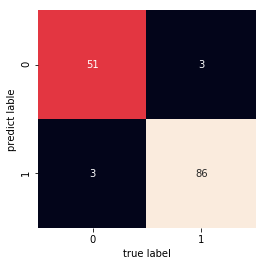

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

NBmat = confusion_matrix(y_predictedNB, y_test)
sns.heatmap(NBmat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predict lable')

print("This is the confusion matrix for NB")

The TP for the NB is 86, FP is 3, FN is 3, TN is 51.

This is the confusion matrix for decision tree


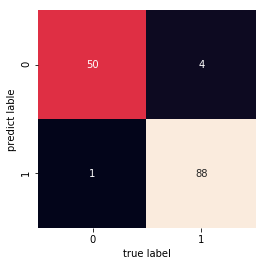

In [26]:
treeMat = confusion_matrix(y_predictedTree, y_test)
sns.heatmap(treeMat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predict lable')

print("This is the confusion matrix for decision tree")

The TP for the decision tree is 87, FP is 2, FN is 4, TN is 50.

This is the confusion matrix for KNN


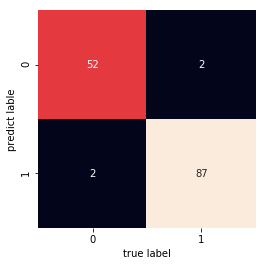

In [27]:
KNNmat = confusion_matrix(y_predictedKNN, y_test)
sns.heatmap(KNNmat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predict lable')

print("This is the confusion matrix for KNN")

The TP for the KNN is 87, FP is 2, FN is 2, TN is 52.

This is the confusion matrix for SVM


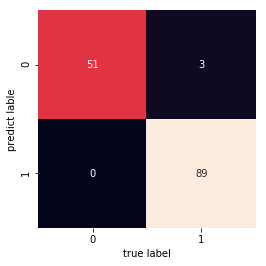

In [28]:
SVMmat = confusion_matrix(y_predictedSVM, y_test)
sns.heatmap(SVMmat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predict lable')

print("This is the confusion matrix for SVM")

The TP for the SVM is 89, FP is 0, FN is 3, TN is 51.

**(d) Write a discussion analyzing and comparing the performance of the four models. For example, which method(s) perform the best and why do you think so? Which method(s) perform the worst and why do you think so? What do the different performance metrics tell you about the results? Your discussion should consist of two to three paragraphs. (Write-up).**

From the result above, I think that the SVM is my best prediction modle for this dataset. Because it has the highest accuracy. Meanwhile, the performance of the precision and the recall are also very good. Although not all the metrics are the highest, it's good enough for the prediction. And since the training data set is selected randomly, so the accuracy score is uesful to describe a model. So, I think the SVM model is the best one.